<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/2_a_Decision_Tree_Classifier_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
%matplotlib inline
#import missingno as msno
# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')
# to display all columns:
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
train_data = pd.read_csv('/content/train.csv')
train = train_data.copy()


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train2=pd.get_dummies(train, columns=['Embarked', 'Sex'],drop_first=True)
train2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

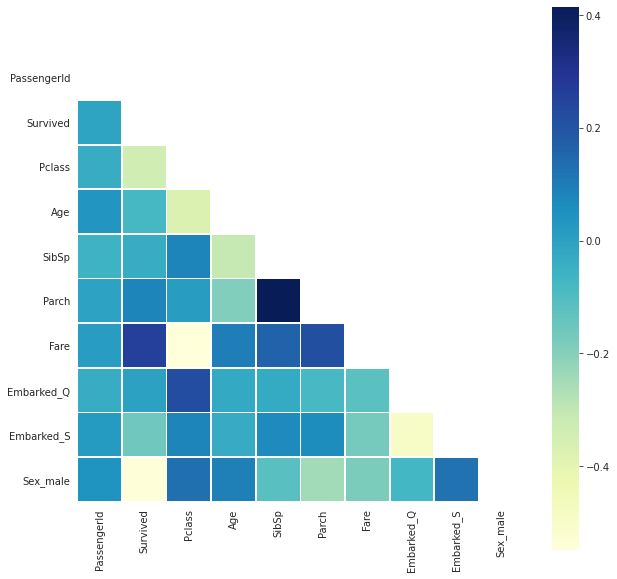

In [6]:
corr=train2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

In [ ]:
train2.info()

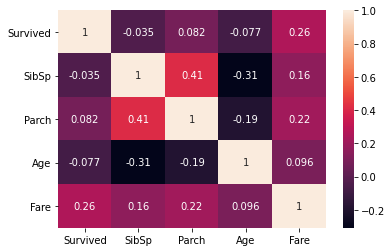

In [8]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

In [ ]:
train.Age.describe()


In [ ]:
train.Age.value_counts()

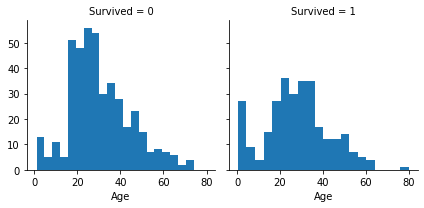

In [12]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

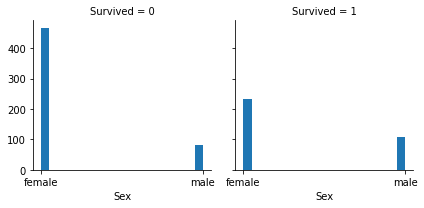

In [13]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

In [14]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

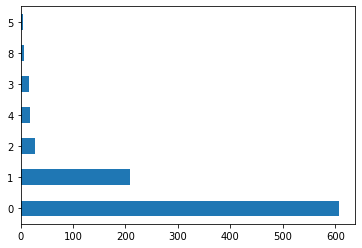

In [15]:
train["SibSp"].value_counts().plot.barh()

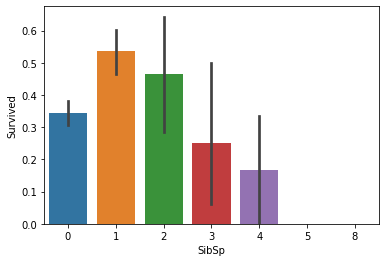

In [16]:
sns.barplot(x="SibSp", y="Survived", data=train);

In [17]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Having a lot of siblings/spouses have less chance to survive

In [18]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

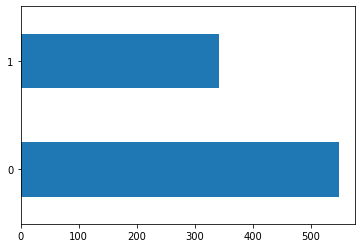

In [19]:
train["Survived"].value_counts().plot.barh();

In [20]:
train2[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived')

,Fare,Survived
56,8.7125,0.0
160,32.3208,0.0
76,11.5000,0.0
163,33.5000,0.0
164,34.0208,0.0
...,...,...
161,32.5000,1.0
77,12.0000,1.0
79,12.2875,1.0
44,8.1125,1.0


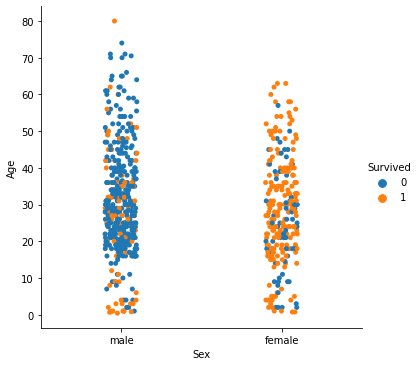

In [25]:
sns.catplot(x = "Sex", y = "Age", hue= "Survived",data = train);

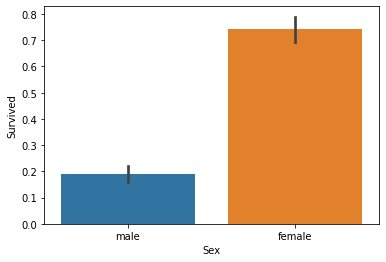

In [26]:
sns.barplot(x="Sex", y="Survived", data=train)

In [27]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


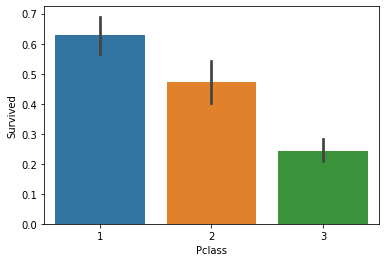

In [28]:
sns.barplot(x="Pclass", y="Survived", data=train);

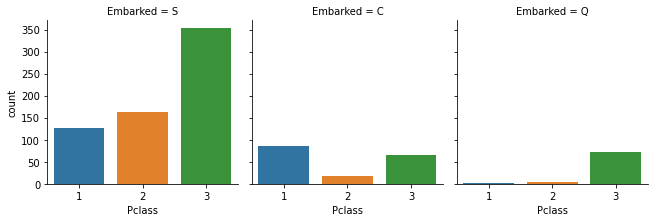

In [29]:
g = sns.factorplot("Pclass", col="Embarked", data=train,
                   size=3, kind="count")

In [30]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
Sex_male         0
dtype: int64

In [31]:
train3=train2.drop(['PassengerId', 'Age', 'Cabin', 'Ticket','Name'], axis=1)

Train and Test split for the modeling purposes (80/20 split)

In [32]:
#Split Value as a Target value
target = train3.Survived
train4 = train3.drop(['Survived'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train4, target, test_size=0.2)

Test different Classification models

In [33]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.794933 (0.052401)
LDA: 0.786502 (0.050740)
KNN: 0.747105 (0.038735)
CART: 0.794933 (0.046377)
NB: 0.783588 (0.046382)
SVM: 0.765376 (0.032587)


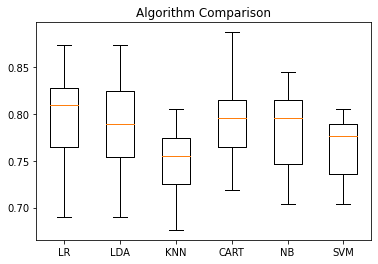

In [34]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

PREDICTION ON THE TEST/VALIDATION DATASET

In [36]:
# Make predictions on validation dataset
bestmodel = DecisionTreeClassifier()
bestmodel.fit(X_train, y_train)
predictions = bestmodel.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8435754189944135
[[100  10]
 [ 18  51]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

